# **1. Descripción del contexto general de los datos**

##**1.1 Fundamento del estudio:**
> La movilidad de las personas a través de medios de transporte ecológicos es cada vez más demandada, lo que ha impactado fuertemente en la utilización de las bicicletas como medio de transporte en las ciudades, dado que la congestión vehicular y los tiempos de desplazamiento han ido en aumento en las ciudades más importantes del mundo.

> Dado este contexto, es de interés para un equipo de inversión, determinar a través de análisis de regresiones qué tanto influyen las condiciones climáticas en el uso de la bicicleta y por ende su arrendamiento, como también determinar estacionalidades, periodos de alta demanda y poder conocer el nivel operacional de una empresa de arrendamiento de bicicletas, en una ciudad en particular

## **1.2 Descripción de los datos a utilizar:**

> * El dataset es una consolidación de registros recolectados en periodos de 1 hora.

> * Son datos que contienen el recuento de bicicletas públicas arrendadas por hora en el sistema de arrendamiento de bicicletas de la ciudad de Seúl, capital de Corea del Sur. 

> * El dataset contiene además, las condiciones meteorológicas en el momento de la extracción o generación de cada observación.

> * A su vez, se incorpora una columna relacionada al tipo de día en curso, si es feriado o no feriado.

> * El dataframe tiene 8760 filas y 14 columnas.

> * Por último el dataset, contiene la fecha en la cual se realizó la extracción del dato, como también la hora del día a la cual pertenece la observación.

In [10]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/patoram123/Proyecto_Visualizacion/main/datasets/public_bikes_2018/seul/SeoulBikeData.csv'
                ,encoding='unicode escape')
print("El dataframe tiene:", df.shape[0],"filas y ", df.shape[1], "Columnas")

El dataframe tiene: 8760 filas y  14 Columnas


# **2. Proceso de limpieza**

## **2.1 Descripción de los datos**


> Para el proceso de descripción de datos se definió una función llamada datainfo( ) que permite imprimir un dataframe con la información de el DataType de cada columna, conteo de valoes no nulos, conteo de valores únicos y conteo de valores nulos.

> *Resultados:* 
* El dataframe contriene 10 variables numéricas.
* 4 variables son enteros (int)
* 6 variables son decimales (float)
* 3 variables son categóricas (Object o string)
* 1 variable es de fecha, que es necesario pasar a Datetime (Object)



## **2.2 Identificar problemas de codificación o formato.**


> Para verificar problemas de codificación o formato, se realizó un análisis visual de los datos, imprimiendo el dataframe y sus formatos para observar la concordacia de estos en base a lo esperado y si estos sirven para el estudio tal como vienen.

> *Resultados:*
> * La columna Date viene como string asociado a datos de fecha separados por "/", esto generará un problema parea el procesamiento de datos, dado que será tratado como un string. Sin embargo es necesario considerar esta como formato fecha, por lo que se transformará la columna a una fecha del tipo datetime, a través de la función **to_datetime( )** de Pandas.



```
            df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
```

> Tambien se utiliza un encoding en el proceso de ingesta de datos, con la finalidad de adecuar la interpretación del uso de caracteres especiales en la lectura de los datos.



```
            df = pd.read_csv(PATH, encoding='unicode escape')
```





## **2.3 Existencia de valores nulos.**

> Uno de los aspectos más importantes en el ánálisis de datos es la gestión de valores nulos, ya que es posible que estos influyan en el resultado de las predicciones o análisis de los datos, por lo que su manejo es estrictamente necesario.

> Para su tratamiento se contó la cantidad de valores nulos de las variables y se construyó un gráfico que nos permite visualizar la traza de nulos presentes en un gráfico matrix de la librería **missingno**.



```
         msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)
```



> *Resultados:*
> * No existen valores nulos en ninguna variable.

## **2.4 Revisión de datos duplicados.**

> Es necesario verificar si existen datos duplicados, ya que estos pueden desbalancear una predicción o se podrían encontrar errores en la imputación o recolección de la data.

> *Resultados:*
> * No se encontraron registros repetidos.Se pueden observar a su vez, ue para los valores únicos de cada columna, para la columna date, hay 356, lo que no hay días fuera del horizonte de tiempo de estudio, 24 horas distintas, 2 tipologías de días hábiles y de vacaciones, 4 estaciones. El resto de las variables son variables continuas o discretas cuyo resultado puede o no repetirse y no generar problemas.

## **2.5 Distribución de las variables categóricas**

Se realizó una análisis de medianas a través de la graficación de BoxPlot para cada variable independiente v la variable dependiente.

> *Resultados:*
> * En el caso de las estaciones del año se ve que la mediana en el verano es superior a todas las demás estaciones, incluyendo incluso muchas observaciones más allá de las 2 desviaciones estandar, lo que manifiesta una dominancia del arrendamiento en esta estación del año
> * En invierno por otra parte se ve que hay una disminución considerable del arrendamiento.
> Para el caso de los días festivos y no festivos, se observa que la mayor cantidad de arrendamiento ocurren en los días no festivos. Esto hace pensar que la mayor parte de los arrendamiento de bicicletas son gatillados por actividades diarias permanentes, como traslado al trabajo-hogar y/o rutina de ejercicio.

## **2.6 Distribución de las variables continuas**

Se realizó un estudio de la distribución de las variables continuas con la finalidad de detectar sesgos y patrones en las variables que permitan realizar inferencias acerca de como están distribuidos los datos y su normalidad.

> *Resultados:*
> * Para el caso del arrendamiento de bicicletas se puede observar una concentración de arrendamientos alrededor de la media en 250 arriendos por día, por lo que se visualiza un sesgo posiivo para estra variable.
> * Para la distirbución de arrendamiendo por hora se puede observar que existen unos máximos bien definidos en algunas horas del día, por lo que se puede inferir que el peack de arrendamiento es a la hora inicial del horario de oficina y a la hora de salida del horario de oficina. Sin embargo el patrón de idiosincrácia del Corea del Sur estrablece actividad posterior a las 6 de la tarde e incluso en la noche.
> * Para la temperatura es posible visualizar una mezcla de gaussianas con medias en torno a los 2°C y 20°C, lo que supone un solapamiento de distribuciones en función de las estaciones del año, con mayor dominancia en el invierno y verano.
> * Para la velocidad del viento se observa un sesgo positivo, así tambien para las variables Solar Radiation, Rainfall, SnowFall.
> * Para la variable Visibility, se observa sesgo Negativo
> * Para la variable día es posible visualizar un comportamiento de consumo mayor día por medio. Sin embargo esa distribución puede deberse debido al comportamiento de los datos y a la creación de Bins del histograma, ya que es posible que se hayan desplazado los datos hacia el bin siguente. Lo mismo pasa con la visualización de conteo de arrendamientos por mes.



## **2.7 Normalización de variables**

Se realizó una graficación de las distribuciones de La variable objetivo y la variable Wind Speed distribucion normal. 
> *Resultados:*
> * Se detecta que estas variables a través de un QQ-Plot no tienen una dstribución normal
> * Por otra parte, se realizó una transformación cuadrática para ajustar un poco mejor los valores de las variables a una distribución normal, mejorando su aspecto en el gráfico.

## **2.8 Creación y eliminación de columnas**

> *Resultados:*
> * La columna **Functioning Day**, que toma valores Yes o No, representa si ese día el servicio de arriendo de bicicletas estuvo operativo o no. Para los días no funcionales, la variable Rented Bike Count tiene solo valores 0 (cero), por lo que se decidió eliminar esas filas y por lo mismo, la columna Functioning Day que deja de tener valor.
> * Se crearon las variables Día y Mes. Elimando la columna Date del Dataset, con la finalidad de agregar valir al separar estas nuevas varibles.

## **2.9 Dummyficación de las variables categóricas**

> *Resultados:*
> * Para poder utilizar las variables categoricas en el análisis, fue necesario realizar una creación de variables dummies para las varuiavles Season y la variable Holiday. Para ello se utilizó el método **get_dummies** de Pandas.
> Para la variable Season se crearon 4 columnas, y para la variable Holiday solo se realizó un OneHotEncoding transformando a través de la función get_dummes en valores 1 o 0.

## **2.10 Análisis de correlación de las variables**

Es parte del análisis realizar una exploración de la relación líneal entre ls variables que participarán en el  estudio, por lo que se realizó la construcción de una matriz de correlación, elaboración de un heatmap para gradualizar la fuerza de correlación y posteriormente una grafico de dispersión para visualizar la correlación de las variables involucradas.

> *Resultados:*
> * Se detecta una fuerte correlación de 0.91% de la variable temperature y la variable Dew Point temperature. 
> * El gráfico de dispersión muestra una fuerte correlación líneal positiva, por lo que se decide eliminar la variable Dew Point Temperature (°C)


# **3. Modelos probados**

> Para el modelamiento se realizó una investigación del estado del arte y se verificó los modelos que tenían mejor desempeño en la regresión del fenómeno. 

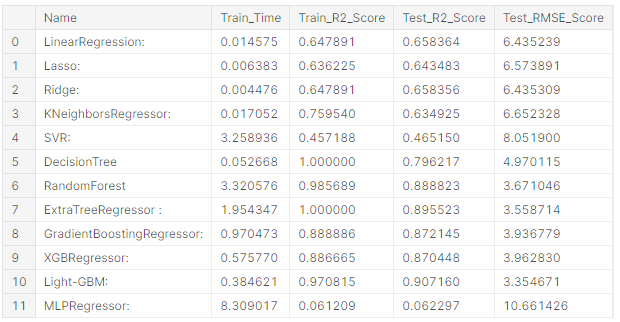

> A su vez, se consideró por defecto la regresión lineal como pivote de comparación inicial para tener en cuenta en el proceso de modelamiento, ya que es un modelo de culto y visualizar su desempeño genera una perspectiva con respecto a otro tipo de modelos.

> La lista de modelos utilizados es:
* Regresión Lineal.
* Regresión Lasso.
* Random Forest.

# 4. Muestren el modelo escogido

Se realizaron 3 modelamientos y los resultados fueron los siguientes:

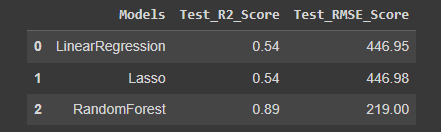



> *Resultados:*
> * En base a los criterios de R2 (Coeficiente de determinación) y el la raíz del error cuadrático medio, es posible establecer que el mejor modelo para predecir la variable de arrendamiento es un modelo de **Random Forest**.

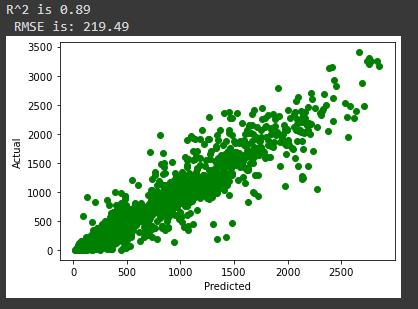

> * Con la finalidad de optimizar el desempeño del modelo se realizo una grilla dehiperparámetros que permitieron revisar cual es la mejor configuración del modelo.

> * Se realizó una evaluación de la importancia de los predictores que como resultado arrojó que las variables ue tienen más implicancia en la predicción es la variable "Hour" con un 29,90%, "Temperature"con un 23,68% y la variable "Humidity" con un 10% de importancia.

# 5. Checkeo de supuestos


## Colinealidad o Multicolinealidad, normalidad de los residuos y Heterocedasticidad.



In [3]:
#Importamos algunas librerías
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
data = pd.read_csv('/content/Clean_SeoulBikeData.csv',
                   encoding='unicode escape')
#Definismo una función para el factor de inflación de varianza
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
calc_vif(data.select_dtypes(include=['float','int']))

,variables,VIF
0,Rented Bike Count,4.912476
1,Hour,5.260620
2,Temperature(Â°C),12.149507
3,Humidity(%),12.847939
4,Wind speed (m/s),4.861370
5,Visibility (10m),7.051835
6,Solar Radiation (MJ/m2),2.584257
7,Rainfall(mm),1.116762
8,Snowfall (cm),1.158301
9,Day,4.043708


VIF = 1: ausencia total de colinealidad

1 < VIF < 5: la regresión puede verse afectada por cierta colinealidad.

5 < VIF < 10: la regresión puede verse altamente afectada por cierta colinealidad.

El término tolerancia es  1VIF  por lo que los límites recomendables están entre 1 y 0.1.

> **Resultados**
> * Podemos asumir que el coeficiente de determinación es alto según lo descrito en los resultados del modelamiento y ninguno de los predictores al parecer resulta muy significativo. Esto demuestra que hay inidicios de multicolinealidad. Para ello, se realizó el cálculo del VIF para observar que la regresión podría verse afectada por una alta colinealidad. Se recomienda eliminar las variables con alto VIF y luego ejecutar la función calc_vif nuevamente, sin embargo ya se eliminaron las variables que a priori tenían alta correlación.

> * Para la  normalidad de los residuos se puede apreciar que n hay una distribución normal de los residuos con respecto a la distribución teórica.

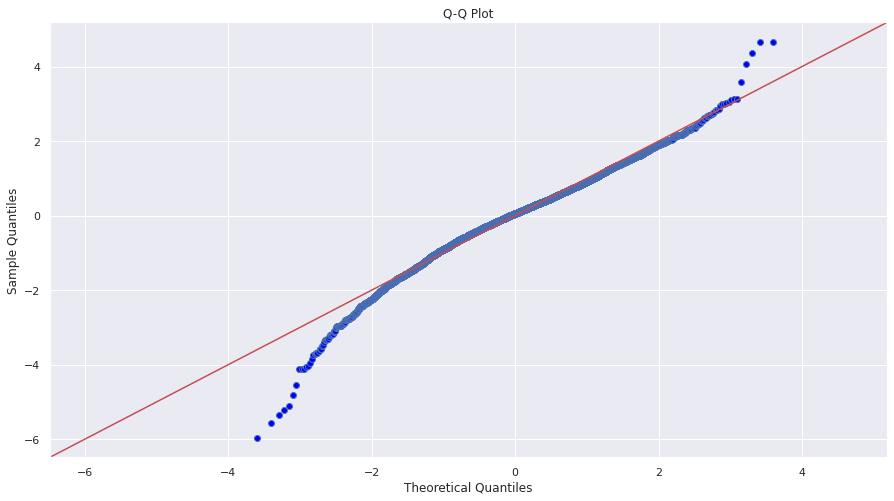

> * Para el caso de la heterosedasticidad, se puede concluir que la varianza es relativamente constante a los largo de las observaciones.

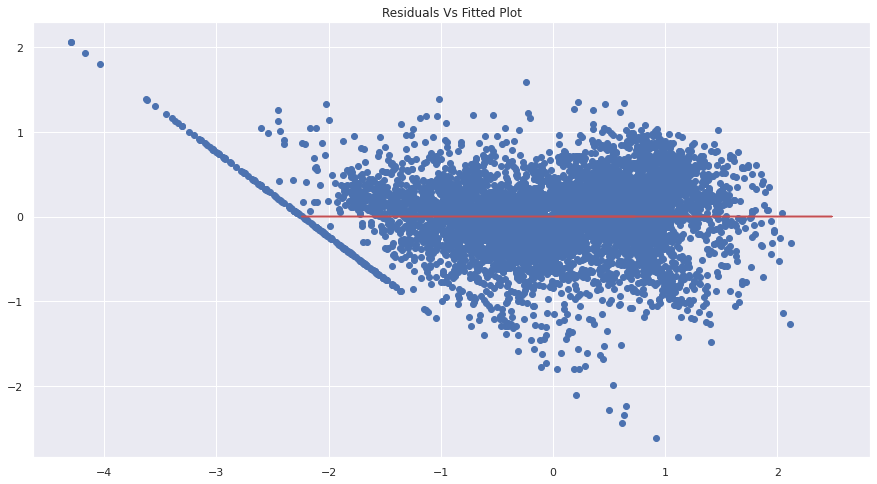

# **6. Conclusiones**



> * El mejor modelo ajustado de los ejecutados es el random forest con un R2 de 0.89 y un RMSE de 219. 
> * Superior en desempeño a los modelos de regresión lineal y lasso.
> Según el análisis de supuestos, es posible determinar que existe cierta multicolinealidad no perfecta, que puede afectar no significativamente al modelo, los residuos si bien siguen un comportamiento normal a lo largo de curva normal teórica hay una separación notable en los extremos lo que hace presumir que los valores predichos siguen un patrón similar al de la variable objetivo, pero que es necesario procesar más los datos posiblemente o que hayan algunos outliers influenciadores que estén afectando el resultado. Por otra parte se puede observar que existe homocedasticidad y que la variables permanece relativamente constante, lo que podría intepretarse como una estabilidad en la aleatroriedad de la predicción.
> En base a estos resultados se puede concluir que se puede ajustar un modelo de regresión de Random Forest que permite precedir la demanda de bicicletas en la ciudad de Seúl en base a las condiciones climáticas.

# **7. Limitaciones finales**


*   Es posible detectar oportunidades de mejora en el proceso de limpieza de datos, por ejemplo transformaciones que permitan normalizar la distribución de las variables continuas. También es posible profundizar en la limpieza en materia de identificaicón de outliers, o comportamientos atípicos que pueden perturbar el resultado de las predicciones. También, siguiente con este punto, también es posible establecer o levantar la existencia de estacionalidades, y o patrones temporales que permitan hacer estimaciones, cuya comparación con el modelo regresivo podría resultar un punto de comparación interesante.
*   Por el lado del modelamiento, existen muchos podemos que es posible utilizar para la predicción de variables continuas, cuyo desempeño puede ser mayor que la regresión lineal. A su vez, y como desafío es posible profundizar en metodologías como feature engineering, formas de muestreo o validación cruzada más eficientes, y en general apuntar al principio de parcimonia para tener un modelamiento más sencillo.
* Es dificil decidir si un modelo puede ser escalable y válido para pasar ap roducción y que este pueda ser utilizado en la industria, ya que para ello bastaría un proceso de validación y prueba un tanto más extenso, utilizando datos nuevos y en tiempo real.
* Puede ser interesante también evaluar el comportamiento de la predicción en otras ciudades y ver cómo influye el patron de idiosincracia y ver si aplica un modelamiento de este estilo en otra ciudad. Sin embargo este modelo es netamente válido para utiliarlo en la ciudad de donde provienen los datos.

